<a href="https://colab.research.google.com/github/angelacantutrevino/CE888-Data-Science-and-Decision-Making/blob/main/Lab3_BankClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 3: Bank Classification**

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import itertools

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier



*   Create a new ipython notebook called bank_classification.ipynb
*   Check the bank dataset
*   bank-additional-full.csv
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
*   In the Ipython notebook you created, load the data from bank-additional-full.csv.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Counting values of categorical columns: 

In [4]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [5]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [6]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [7]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [8]:
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [9]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [10]:
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [11]:
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [12]:
df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [13]:
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

Checking the numerical columns:

In [14]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


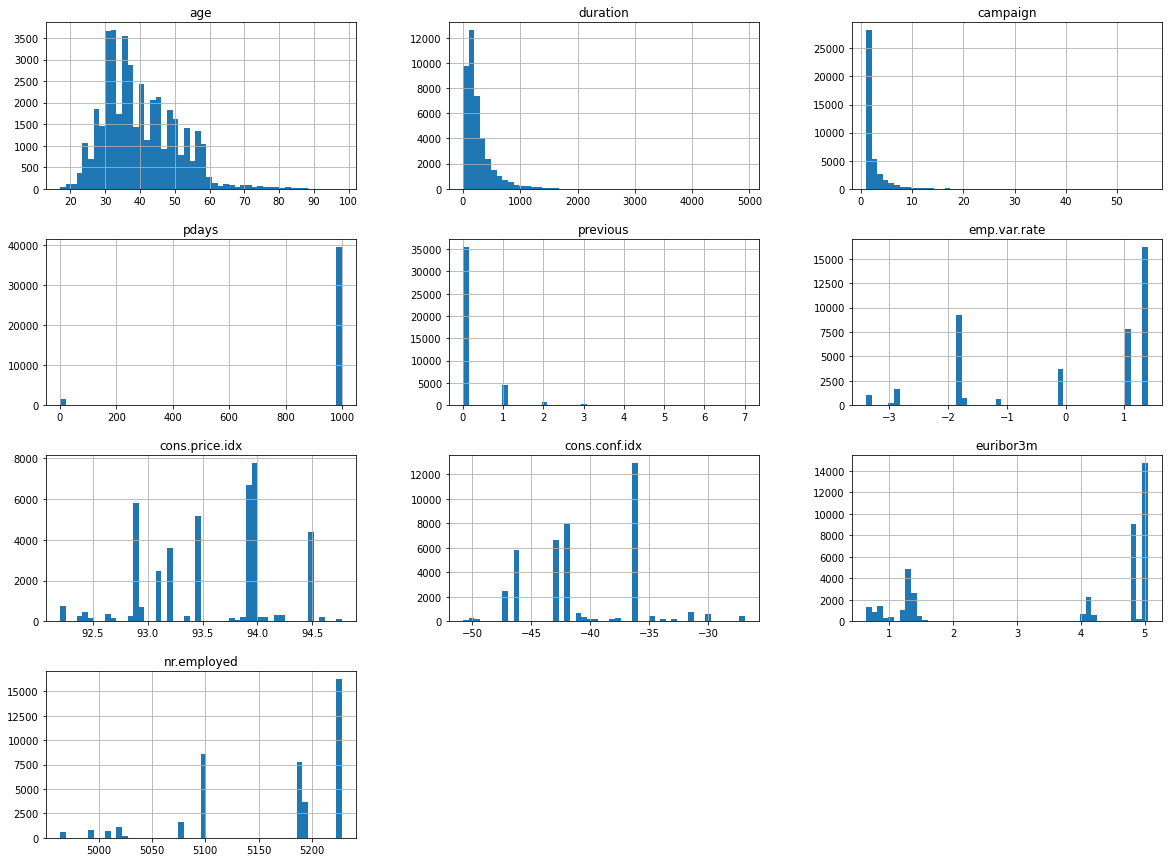

In [15]:
_ = df.hist(bins=50, figsize=(20,15))

## **Data Pre-Processing**

*   Check if there are any missing values in the dataset. If there are, drop the rows.

In [16]:
df_copy = df.copy()
# Most algorithms cannot work with missing values. Three main ways to deal with them:
# 1. Drop rows
# 2. Drop features with NaNs
# 3. Fill missing values
# As we have very few missing values, let's drop the rows
print("Number of rows before dropping NaNs: %d" % len(df))
df_copy = df_copy.dropna()
print("Number of rows after dropping NaNs: %d" % len(df))
# Separate features from outcomes
y_df = df_copy.T.tail(1).T.copy()
#y_df = np.array(df['y'].copy()).reshape(-1,1)
X_df = df_copy.iloc[:,:-1].copy()

Number of rows before dropping NaNs: 41188
Number of rows after dropping NaNs: 41188




*   Column "duration" must be deleted



In [17]:
X_df.drop(columns=["duration"],inplace=True)



*   Use LabelEncoder to convert the label into numbers.
*   Perform one-hot encoding on the categorical features using df_dummies = pd.get_dummies(df).



In [18]:
outcomesLabelEncoder = LabelEncoder()
y_df = y_df.apply(outcomesLabelEncoder.fit_transform)



*   Plot a histogram of the label (i.e., column 'y') and calculate the imbalance in the dataset (i.e., divide the number of instances of the minority class by the total length of the dataframe).



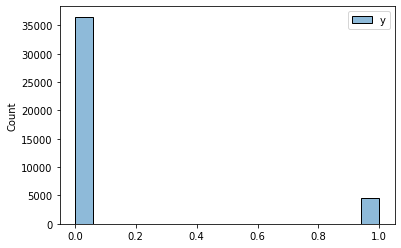

In [19]:
_ = sns.histplot(y_df, kde=False)

In [20]:
print(y_df.value_counts())
print(X_df.shape[0])

y
0    36548
1     4640
dtype: int64
41188


In [21]:
print(4640/41188)

0.11265417111780131


In [22]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [23]:
X_df = pd.get_dummies(X_df, columns=list(['job','marital','education','default','loan','contact','poutcome','housing']))

In [24]:
cleanup_month = {"month": {'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11}}
X_df.replace(cleanup_month, inplace=True)
X_df.head()

,age,month,day_of_week,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,housing_no,housing_unknown,housing_yes
0,56,4,mon,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,1,0,1,0,0
1,57,4,mon,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,1,0,1,0,0
2,37,4,mon,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,1,0,0,0,1
3,40,4,mon,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,1,0,1,0,0
4,56,4,mon,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,1,0,1,0,1,0,0


In [25]:
cleanup_day = {"day_of_week": {'mon':0,'tue':1,'wed':2,'thu':3,'fri':4,'sat':5,'sun':6}}
X_df.replace(cleanup_day, inplace=True)
X_df.head()

,age,month,day_of_week,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,housing_no,housing_unknown,housing_yes
0,56,4,0,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,1,0,1,0,0
1,57,4,0,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,1,0,1,0,0
2,37,4,0,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,1,0,0,0,1
3,40,4,0,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,1,0,1,0,1,0,0
4,56,4,0,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,1,0,1,0,1,0,0


## **Data Modeling**



*   Using the train_test_split function in scikit-learn, separate your dataset into a training and a test set, with a test size of 20% and random_state=50. Make sure the train/test split is stratified using the stratify parameter (and check that it is!). Stratified means that the percentages of classes in each fold remains constant.



In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=50,stratify=y_df)  
print(len(X_train), len(X_test))

32950 8238



*   Report the results of 10-fold stratified cross-validation on the training set using a random forest classifier with 100 trees and depth=3. Ensure you're using an appropriate metric (print sorted(sklearn.metrics.SCORERS.keys()) to see what are the valid options and choose one for cross-validation).



In [27]:
X_dummy = X_train
y_dummy = y_train
dummyClf = DummyClassifier(strategy="stratified")
scores_dummy = cross_val_score(estimator=dummyClf,X=X_dummy,y=y_dummy,scoring="f1",cv=10)
print(scores_dummy.mean())

0.10921207370682307


In [28]:
X_rf = X_train
y_rf = y_train
clf_rf = RandomForestClassifier(n_estimators=400, max_depth=6)
scores_rf_100 = cross_val_score(estimator=clf_rf,X=X_rf,y=np.array(y_rf).ravel(),scoring='f1',cv=10)
print(scores_rf_100.mean())

0.28706556002563927


In [29]:
X_rf = X_train
y_rf = y_train
clf_rf = RandomForestClassifier(n_estimators=250, max_depth=6)
scores_rf_100 = cross_val_score(estimator=clf_rf,X=X_rf,y=np.array(y_rf).ravel(),scoring='f1',cv=10)
print(scores_rf_100.mean())

0.28869106947178713


In [30]:
X_rf_100 = X_train
y_rf_100 = y_train
clf_rf_100 = RandomForestClassifier(n_estimators=100, max_depth=6)
scores_rf_100 = cross_val_score(estimator=clf_rf_100,X=X_rf_100,y=np.array(y_rf_100).ravel(),scoring='f1',cv=10)
print(scores_rf_100.mean())

0.28787853572140115


In [31]:
X_rf_750 = X_train
y_rf_750 = y_train
clf_rf_750 = RandomForestClassifier(n_estimators=200, max_depth=12,random_state=60)
clf_rf_750.fit(X=X_rf_750, y=np.array(y_rf_750).ravel())
clf_rf_750.feature_importances_

array([6.75813774e-02, 3.97744845e-02, 3.00341027e-02, 3.00286077e-02,
       8.15230720e-02, 2.01845571e-02, 5.66565334e-02, 5.47760813e-02,
       5.11101028e-02, 1.64359124e-01, 1.18251391e-01, 7.45787835e-03,
       6.80880626e-03, 2.35912947e-03, 3.05559352e-03, 4.55045087e-03,
       6.56906799e-03, 3.65691925e-03, 4.60383779e-03, 5.18782983e-03,
       7.13371543e-03, 3.72098580e-03, 2.33950114e-03, 5.07845448e-03,
       7.85233393e-03, 7.81247090e-03, 1.01080603e-03, 5.02309058e-03,
       3.60708777e-03, 5.62752278e-03, 7.76061189e-03, 3.62447743e-04,
       6.34314946e-03, 9.71269718e-03, 4.59346481e-03, 5.47527848e-03,
       4.82686301e-03, 5.00087230e-08, 7.28496307e-03, 2.84203432e-03,
       6.88348129e-03, 1.29283014e-02, 1.16643678e-02, 1.11170231e-02,
       1.31025992e-02, 6.58334853e-02, 9.56697222e-03, 2.71710153e-03,
       9.25019257e-03])


*   Print the cross-validation metric (whichever you previously chose) that you obtain for the random forest for the best parameters found with GridSearchCV (on your training set)

In [32]:
X_train.head()

,age,month,day_of_week,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,housing_no,housing_unknown,housing_yes
38445,22,9,4,3,6,1,-3.4,92.431,-26.9,0.730,...,0,0,1,0,0,0,1,1,0,0
17713,36,6,1,1,999,0,1.4,93.918,-42.7,4.961,...,0,0,1,0,0,1,0,0,0,1
30309,37,3,3,1,999,0,-1.8,93.075,-47.1,1.365,...,0,0,1,0,0,1,0,0,0,1
25951,38,10,2,2,999,0,-0.1,93.200,-42.0,4.120,...,0,0,1,0,0,1,0,1,0,0
29064,41,3,4,3,999,0,-1.8,93.075,-47.1,1.405,...,0,0,1,0,0,1,0,1,0,0


In [36]:
X_rf_100 = X_train
y_rf_100 = y_train
x_rf_100_test = X_test
y_rf_100_test = y_test
clf_rf_100 = RandomForestClassifier(n_estimators=100, max_depth=12,random_state=60)
clf_rf_100.fit(X=X_rf_100,y=np.array(y_rf_100).ravel())

RandomForestClassifier(max_depth=12, random_state=60)